## Cleaning the Data

Now that we have our data we will clean it in order to analyze it and plot it later on. 

In [503]:
import numpy as np
dataset = pd.read_csv("/Users/ironhackberlin/Desktop/dataTokenAdvance.csv")

**converting usd_raised to int** : 

In [504]:
dataset['usd_raised'] = dataset['usd_raised'].astype('int64') 

***removing the x's*** ***and replacing the 0's to NaN***

In [505]:
dataset['token_return'] = dataset['token_return'].str.replace('x','')
dataset['eth_return'] = dataset['eth_return'].str.replace('x','')
dataset['btc_return'] = dataset['btc_return'].str.replace('x','')
dataset['token/eth_return'] = dataset['token/eth_return'].str.replace('x','')
dataset['token/btc_return'] = dataset['token/btc_return'].str.replace('x','')
dataset = dataset.replace(0, np.nan)

***max display settings***

In [506]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [507]:
dataset.head()

,name,usd_raised,month,token_sale_price,current_token_price,token_return,eth_return,btc_return,token/eth_return,token/btc_return
0,Tezos,230607346,Jul 2017,0.470,2.494,5.31,0.57,1.78,9.35,2.99
1,Sirin Labs,157885825,Dec 2017,0.470,0.011,0.02,0.16,0.30,0.15,0.08
2,The Bancor Protocol,153000000,Jun 2017,3.857,1.572,0.41,0.30,1.58,1.38,0.26
3,Bankera,150000000,Feb 2018,0.015,0.002,0.11,0.14,0.40,0.80,0.28
4,QASH,108174500,Nov 2017,0.309,0.034,0.11,0.39,0.56,0.28,0.19


In [508]:
dataset.tail()

,name,usd_raised,month,token_sale_price,current_token_price,token_return,eth_return,btc_return,token/eth_return,token/btc_return
375,Beyond the Void,115500,Nov 2016,0.004,0.001,0.19,13.85,5.62,0.01,0.03
376,Tokes,81099,Jan 2017,0.125,0.051,0.40,12.34,5.04,0.03,0.08
377,Procommerce,77000,Feb 2017,0.027,NaN,0.00,7.73,3.55,0.00,0.00
378,Bolenum,18606,Aug 2017,0.724,0.006,0.01,0.40,0.97,0.02,0.01
379,Spectrecoin,15426,Jan 2017,0.001,0.085,105.29,11.56,4.60,9.10,22.89


In [509]:
print("Information of total number of non-empty columns")
print("-------------------------------------------------")
print(dataset.info(null_counts=True))

Information of total number of non-empty columns
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 380 non-null    object 
 1   usd_raised           380 non-null    int64  
 2   month                380 non-null    object 
 3   token_sale_price     376 non-null    float64
 4   current_token_price  328 non-null    float64
 5   token_return         362 non-null    object 
 6   eth_return           378 non-null    object 
 7   btc_return           379 non-null    object 
 8   token/eth_return     364 non-null    object 
 9   token/btc_return     364 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 29.8+ KB
None


In [510]:
print('Rows {rows} in total and Columns {columns} in total'.format(rows=dataset.shape[0],columns=dataset.shape[1]))

Rows 380 in total and Columns 10 in total


In [511]:
print("Columns and their datatypes")
dataset.dtypes #.dtypes are used to display datatypes of each column

Columns and their datatypes


name                    object
usd_raised               int64
month                   object
token_sale_price       float64
current_token_price    float64
token_return            object
eth_return              object
btc_return              object
token/eth_return        object
token/btc_return        object
dtype: object

## Handling missing values

In [512]:
print("Frequency count of missing values")
dataset.apply(lambda X:sum(X.isnull())) 

Frequency count of missing values


name                    0
usd_raised              0
month                   0
token_sale_price        4
current_token_price    52
token_return           18
eth_return              2
btc_return              1
token/eth_return       16
token/btc_return       16
dtype: int64

In [513]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

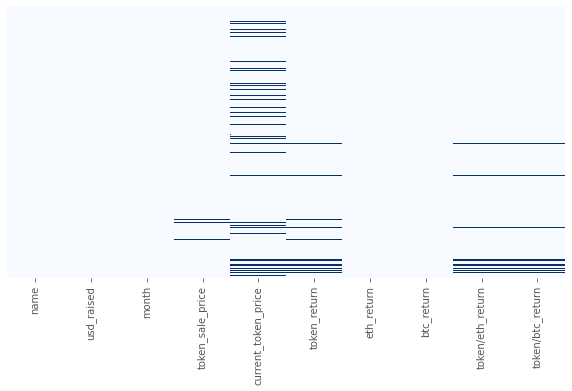

In [514]:
plt.figure(figsize=(10,5)) #plt is the object of matplot lib and .figure() is used to show or change properties of graphs
sns.heatmap(dataset.isnull(),cmap='Blues',yticklabels=False,cbar=False)#heatmaps are matrix plots which can visualize data in 2D
plt.show()

***As temp is a useless columns we delete it***

In [515]:
#del dataset['temp']

***Interpolation to predict missing values in each column and replacing***

Interpolated each columns ...

In [1007]:
df = dataset.interpolate(method='linear', axis=0).ffill().bfill()

Now that our data is cleaned we can proceed to vizualisation and further analyse our dataset

In [954]:
df.describe()['usd_raised'].astype(int)

count          380
mean      20250746
std       23872533
min          15426
25%        5500000
50%       14770500
75%       26387269
max      230607346
Name: usd_raised, dtype: int64

In [955]:
print(df['name'].nunique())

380


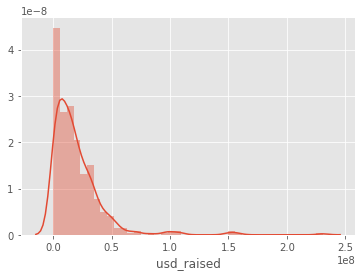

In [956]:
sns.distplot(df["usd_raised"])

## Top 10 startups had most funding

In [957]:
print("Skewness %f" % df["usd_raised"].skew())
print("Kurtosis %f" % df["usd_raised"].kurt())

Skewness 3.889428
Kurtosis 23.452806


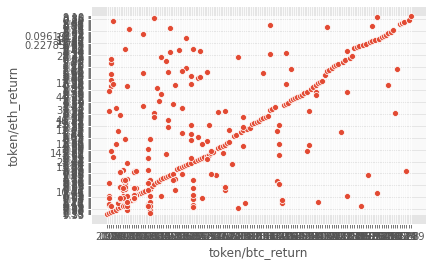

In [993]:
#scatter plot token b
sns.scatterplot(data = df, y = "token/eth_return", x = "token/btc_return");

***Analysis*** :
From the scatterplot above displaying the return for every token in either Ethereum(y) or Bitcoin (x) we can notice a linearity in most of the startups as well as dispersion for others.

***Top 6 by funds raised in $***

In [959]:
tp10fund= df.groupby('name')['usd_raised'].sum().sort_values(ascending=False)
tp10fund.head(3)

name
Tezos                  230607346
Sirin Labs             157885825
The Bancor Protocol    153000000
Name: usd_raised, dtype: int64

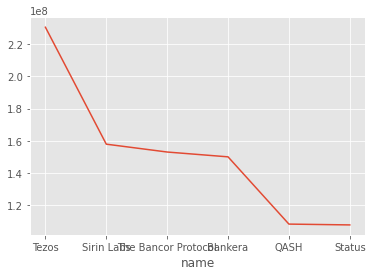

In [960]:
tp10fund.head(6).plot()

***Top 6 in terms of btc returns***

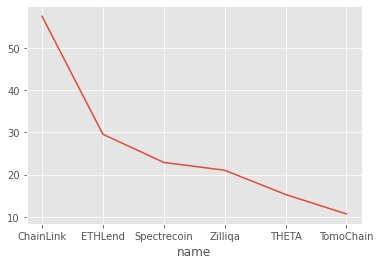

In [961]:
df2 = df
df2['token/btc_return'] = pd.to_numeric(df2['token/btc_return'])
tp10btc= df.groupby('name')['token/btc_return'].sum().sort_values(ascending=False)
tp10btc.head(6).plot()

***Top 6 in terms of eth returns***

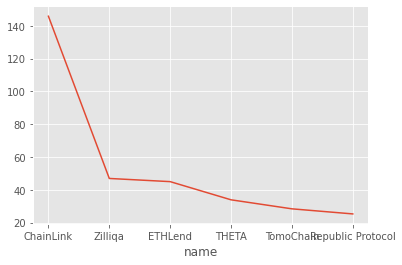

In [962]:
df2['token/eth_return'] = pd.to_numeric(df2['token/eth_return'])
top10eth = df.groupby('name')['token/eth_return'].sum().sort_values(ascending=False)
top10eth.head(6).plot()

***Now we will investigate more Tezos and The Bancor Protocol Prices compared to BTC***

# Collecting XTZ/BTC & BNT/BTC historical data from Poloniex

***Tezos/BTC:***

Processed: BTC_XTZ


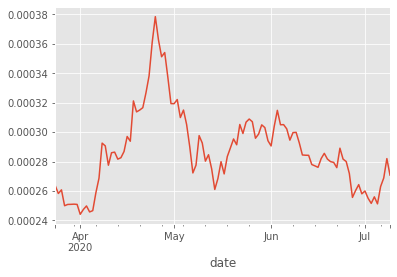

In [963]:
#Reads the Data and gets it as csv
def CryptoData(symbol, frequency):
    url ='https://poloniex.com/public?command=returnChartData&currencyPair='+symbol+'&end=99999999999&period='+str(frequency)+'&start=0'
    xtz = pd.read_json(url)
    xtz.set_index('date',inplace=True)
    df.to_csv(symbol + '.csv')
    print('Processed: ' + symbol)
    return xtz
xtz = CryptoData('BTC_XTZ', 86400)['close']
xtz.plot()

In [964]:
xtz.pct_change().describe()

count    107.000000
mean       0.000732
std        0.031356
min       -0.061270
25%       -0.022562
50%       -0.000211
75%        0.018794
max        0.093134
Name: close, dtype: float64

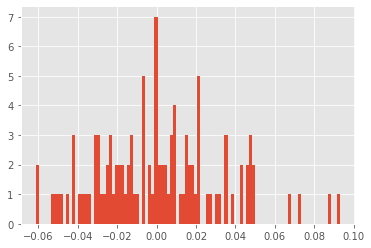

In [965]:
xtz.pct_change().hist(bins=100)

***The Bancor Protocol/BTC***

In [966]:
#read the data and save it as a csv
def CryptoData(symbol, frequency):
    url ='https://poloniex.com/public?command=returnChartData&currencyPair='+symbol+'&end=9999999999&period='+str(frequency)+'&start=0'
    bnt = pd.read_json(url)
    bnt.set_index('date',inplace=True)
    df.to_csv(symbol + '.csv')
    print('Processed: ' + symbol)
    return bnt
bnt = CryptoData('BTC_BNT', 86400)['close']

Processed: BTC_BNT


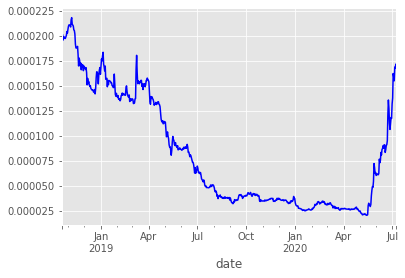

In [967]:
bnt.plot(color='blue')

In [968]:
bnt.pct_change().describe()

count    629.000000
mean       0.000716
std        0.045504
min       -0.117379
25%       -0.019931
50%       -0.001946
75%        0.014875
max        0.429933
Name: close, dtype: float64

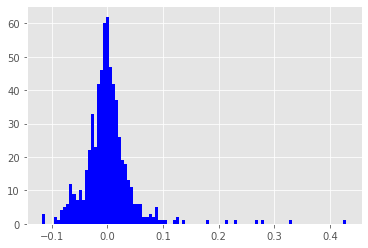

In [969]:
bnt.pct_change().hist(bins=100, color = "blue")

## Analysing multiple crypto values in btc

In [970]:
tickers = ['BTC_ATOM','BTC_AVA','BTC_BAT','BTC_BCHABC','BTC_BCHSV','BTC_BNT','BTC_BTS','BTC_CHR','BTC_CVC','BTC_DASH','BTC_DCR','BTC_DOGE','BTC_EOS','BTC_ETC','BTC_ETH','BTC_ETHBNT','BTC_FOAM','BTC_FXC','BTC_GAS','BTC_KNC','BTC_LEND' ,'BTC_LINK','BTC_LOOM','BTC_LPT','BTC_LRC','BTC_LSK','BTC_LTC','BTC_MANA','BTC_MATIC','BTC_MDT','BTC_MKR','BTC_NEO','BTC_NMR','BTC_NXT','BTC_OMG','BTC_POLY','BTC_QTUM','BTC_REN','BTC_REP','BTC_SC','BTC_SNT','BTC_SNX','BTC_STEEM','BTC_STORJ','BTC_STR','BTC_STRAT','BTC_SWFTC','BTC_WRX','BTC_XEM','BTC_XFIL','BTC_XMR','BTC_XRP','BTC_XTZ','BTC_ZEC','BTC_ZRX']

In [ ]:
def CryptoDataCSV(symbol, frequency):
    #Params: String symbol, int frequency = 300,900,1800,7200,14400,86400
    #Returns: df from first available date
    url ='https://poloniex.com/public?command=returnChartData&currencyPair='+symbol+'&end=9999999999&period='+str(frequency)+'&start=0'
    df = pd.read_json(url)
    df.set_index('date',inplace=True)
    df.to_csv(symbol + '.csv')
    print('Processed: ' + symbol)
for ticker in tickers:
    CryptoDataCSV(ticker, 86400)

In [973]:
df3 = tickers[0:13]
df4 = tickers[14:27]
df5 = tickers[28:40]
df6 = tickers[41:55]
crypto_df = pd.DataFrame()
crypto_df2 = pd.DataFrame()
crypto_df3 = pd.DataFrame()
crypto_df4 = pd.DataFrame()


for ticker in df3:
    crypto_df[ticker] = pd.read_csv(ticker+'.csv',index_col='date')['close']
    
for ticker in df4:
    crypto_df2[ticker] = pd.read_csv(ticker+'.csv',index_col='date')['close']
    
for ticker in df5:
    crypto_df3[ticker] = pd.read_csv(ticker+'.csv',index_col='date')['close']
    
for ticker in df6:
    crypto_df4[ticker] = pd.read_csv(ticker+'.csv',index_col='date')['close']

crypto_df.dropna(inplace=True)
crypto_df2.dropna(inplace=True)
crypto_df3.dropna(inplace=True)
crypto_df4.dropna(inplace=True)

***Now that we have all the cryptos in one dataframe, let’s visualise the relative performance of the currencies. To do that, we will divide the whole dataframe by the first row, normalising it such that the first entry will be 1 for all currencies and subsequent cells within columns will represent respective percentage gains:***

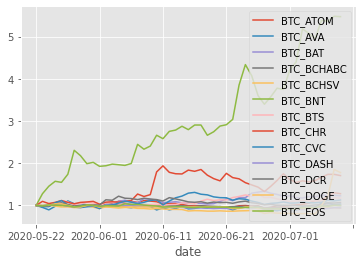

In [974]:
crypto_df = crypto_df.divide(crypto_df.iloc[0])
crypto_df.plot()

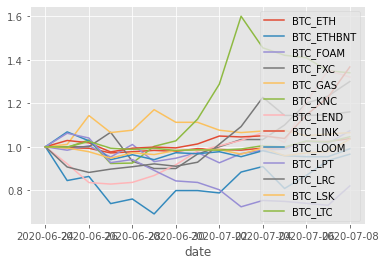

In [975]:
crypto_df1 = crypto_df2.divide(crypto_df2.iloc[0])
crypto_df1.plot()

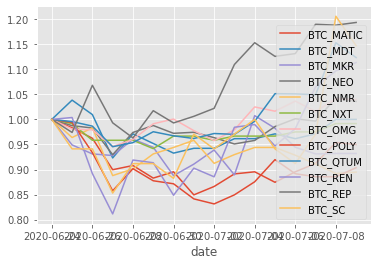

In [976]:
crypto_df2 = crypto_df3.divide(crypto_df3.iloc[0])
crypto_df2.plot()

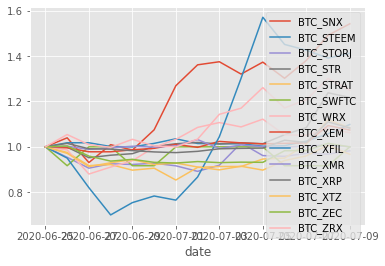

In [977]:
crypto_df3 = crypto_df4.divide(crypto_df4.iloc[0])
crypto_df3.plot()

In [978]:
crypto_df_pct = crypto_df.pct_change().dropna()
crypto_df1_pct = crypto_df1.pct_change().dropna()
crypto_df2_pct = crypto_df2.pct_change().dropna()
crypto_df3_pct = crypto_df3.pct_change().dropna()

In [979]:
corr = crypto_df_pct.corr()
corr1 = crypto_df1_pct.corr()
corr2 = crypto_df2_pct.corr()
corr3 = crypto_df3_pct.corr()

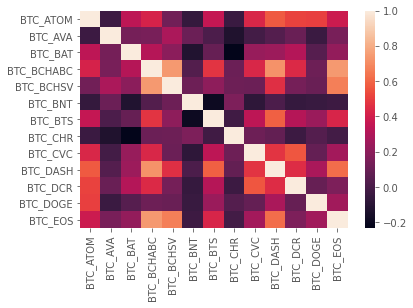

In [980]:
import seaborn as sns
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

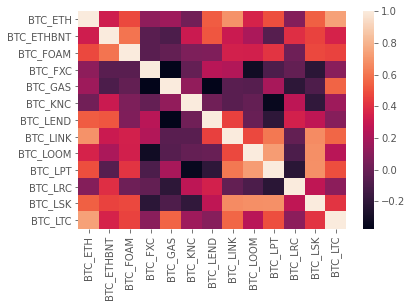

In [981]:
sns.heatmap(corr1,
            xticklabels=corr1.columns.values,
            yticklabels=corr1.columns.values)

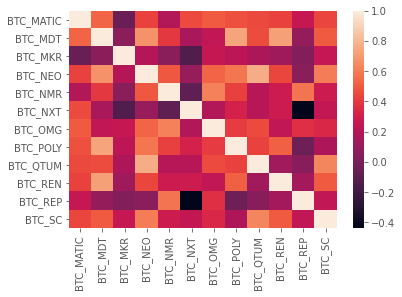

In [982]:
sns.heatmap(corr2,
            xticklabels=corr2.columns.values,
            yticklabels=corr2.columns.values)

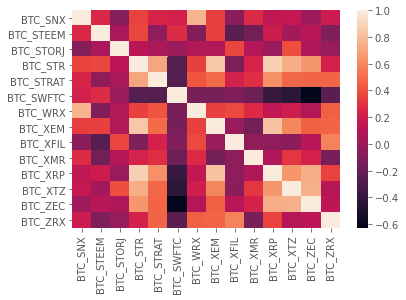

In [983]:
sns.heatmap(corr3,
            xticklabels=corr3.columns.values,
            yticklabels=corr3.columns.values)

-0.03406472912344852


Text(0, 0.5, 'BTC_BNT % Return')

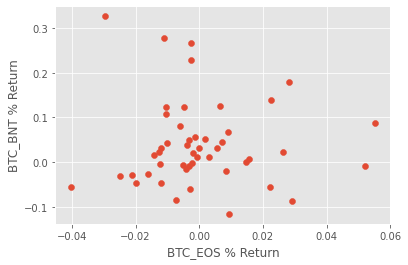

In [984]:
print(corr["BTC_EOS"]["BTC_BNT"])
plt.scatter(crypto_df_pct['BTC_EOS'],crypto_df_pct['BTC_BNT'])
plt.xlabel('BTC_EOS % Return')
plt.ylabel('BTC_BNT % Return')

In [985]:
print(corr1["BTC_ETH"]["BTC_LTC"])
plt.scatter(crypto_df1_pct['BTC_ETH'],crypto_df1_pct['BTC_LTC'])
plt.xlabel('BTC_ETH % Return')
plt.ylabel('BTC_LTC % Return')S

SyntaxError: invalid syntax (<ipython-input-985-bf7beffe8580>, line 4)

-0.449017873791614


Text(0, 0.5, 'BTC_SWFTC % Return')

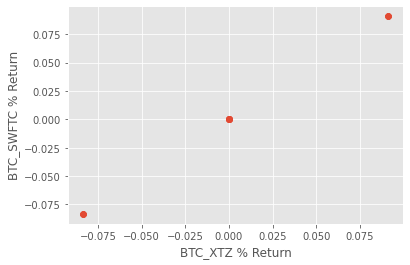

In [986]:
print(corr3['BTC_XTZ']['BTC_SWFTC'])
plt.scatter(crypto_df3_pct['BTC_SWFTC'],crypto_df3_pct['BTC_SWFTC'])
plt.xlabel('BTC_XTZ % Return')
plt.ylabel('BTC_SWFTC % Return')

In [987]:
import statsmodels.api as sm
model = sm.OLS(crypto_df3_pct['BTC_XTZ'],
crypto_df3_pct['BTC_STR']).fit()
model.summary()

/Users/ironhackberlin/miniconda3/envs/boogie_woogie/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=14



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                BTC_XTZ   R-squared (uncentered):                   0.455
Model:                            OLS   Adj. R-squared (uncentered):              0.413
Method:                 Least Squares   F-statistic:                              10.86
Date:                Thu, 09 Jul 2020   Prob (F-statistic):                     0.00580
Time:                        03:59:06   Log-Likelihood:                          33.022
No. Observations:                  14   AIC:                                     -64.04
Df Residuals:                      13   BIC:                                     -63.41
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BTC_STR        0.4816      0.146      3.296      0.006       0.166       0.797
==============================================================================
Omnibus:                        2.377   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.305   Jarque-Bera (JB):                1.027
Skew:                           0.143   Prob(JB):                        0.598
Kurtosis:                       1.704   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'BTC_STR % Return')

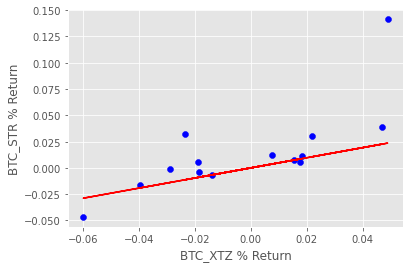

In [988]:
line=[model.params[0]*i for i in crypto_df3_pct['BTC_XTZ'].values]
plt.plot(crypto_df3_pct['BTC_XTZ'], line, c = 'r')
plt.scatter(crypto_df3_pct['BTC_XTZ'],crypto_df3_pct['BTC_STR'], color="blue")
plt.xlabel('BTC_XTZ % Return')
plt.ylabel('BTC_STR % Return')